In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

1)

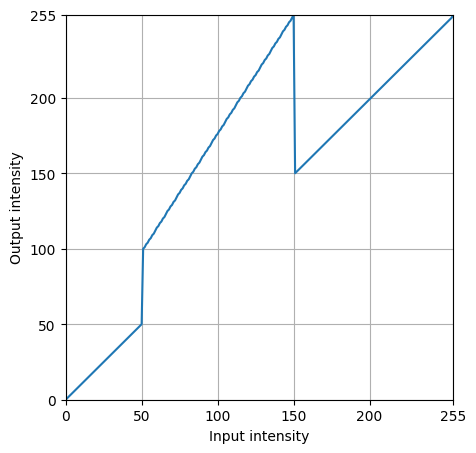

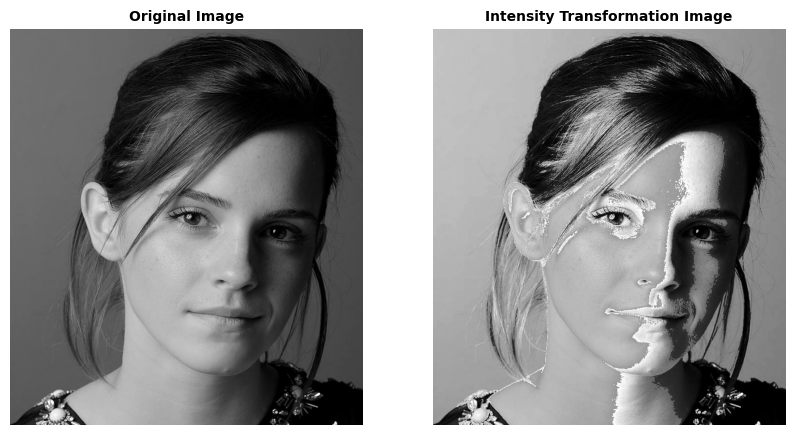

In [3]:
t1=np.linspace(0,50,51).astype('uint8')
t2=np.linspace(100,255,100).astype('uint8')
t3=np.linspace(150,255,105).astype('uint8')
label = [0, 50, 100,150, 200,255]
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

plt.figure(figsize = (5,5))
plt.plot(transform)
plt.grid('on')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xticks(label)
plt.yticks(label)
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

img_orig =cv.imread(r'D:\accedemic\sem-5\EN3160 - Image Processing and Machine Vision\assignment 1\emma.jpg' , cv.IMREAD_GRAYSCALE)
img_transformed=cv.LUT(img_orig,transform)

f, ax=plt.subplots(1,2,figsize = (10,10))
img_orig=cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_transformed=cv.cvtColor(img_transformed,cv.COLOR_BGR2RGB)

ax[0].imshow(img_orig)
ax[0].set_title('Original Image',fontweight ="bold",fontsize = 10)
ax[0].axis('off')
ax[1].imshow(img_transformed)
ax[1].set_title('Intensity Transformation Image',fontweight ="bold",fontsize = 10)
ax[1].axis('off')

plt.show()

2)

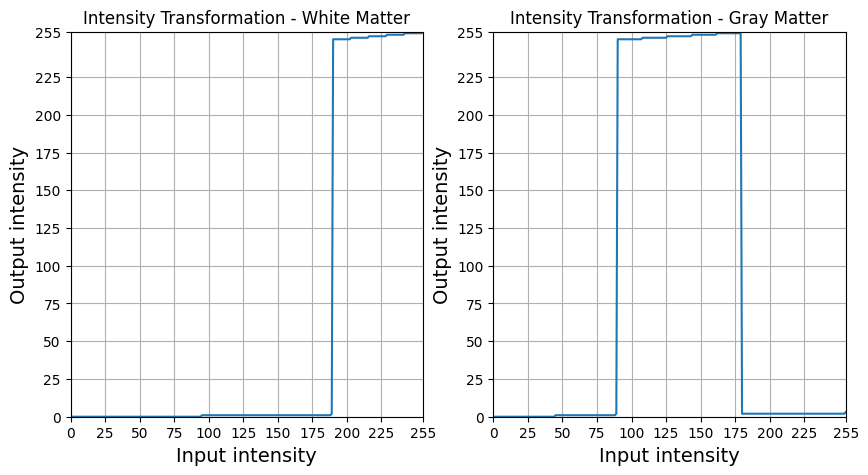

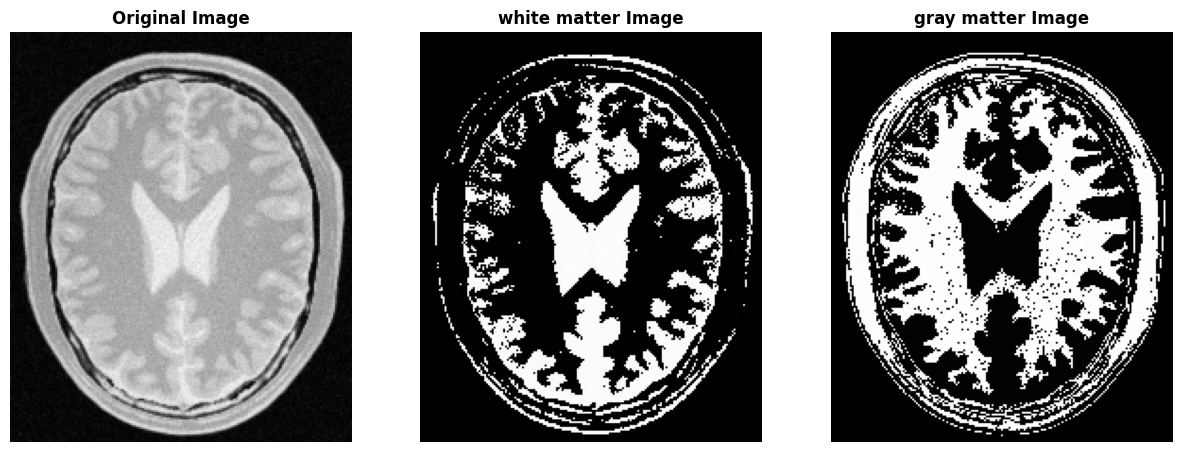

In [2]:
t1=np.linspace(0,2,190).astype('uint8')
t2=np.linspace(250,255,66).astype('uint8')

p1=np.linspace(0,2,90).astype('uint8')
p2=np.linspace(250,255,90).astype('uint8')
p3=np.linspace(2,3,76).astype('uint8')

label = [0, 25,50,75, 100,125,150,175, 200,225,255]

white = np.concatenate((t1, t2 ), axis=0).astype('uint8')
gray = np.concatenate((p1, p2 , p3), axis=0).astype('uint8')

f, ax=plt.subplots(1,2,figsize = (10,5))

ax[0].plot(white)
ax[0].set_title('Intensity Transformation - White Matter', fontsize = 12)
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input intensity', fontsize = 14)
ax[0].set_ylabel('Output intensity', fontsize = 14)

ax[1].plot(gray)
ax[1].set_title('Intensity Transformation - Gray Matter', fontsize = 12)
ax[1].grid('on')
ax[1].set_xlim([0, 255])
ax[1].set_ylim([0, 255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input intensity', fontsize = 14)
ax[1].set_ylabel('Output intensity', fontsize = 14)


img_orig =cv.imread(r'D:\accedemic\sem-5\EN3160 - Image Processing and Machine Vision\assignment 1\BrainProtonDensitySlice9.png' , cv.IMREAD_GRAYSCALE)
assert img_orig is not None
img_white=cv.LUT(img_orig,white)
img_gray=cv.LUT(img_orig,gray)

f, ax=plt.subplots(1,3,figsize = (15,8))
img_orig=cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_white=cv.cvtColor(img_white,cv.COLOR_BGR2RGB)
img_gray=cv.cvtColor(img_gray,cv.COLOR_BGR2RGB)

ax[0].imshow(img_orig)
ax[0].set_title('Original Image',fontweight ="bold",fontsize = 12)
ax[0].axis('off')
ax[1].imshow(img_white)
ax[1].set_title('white matter Image',fontweight ="bold",fontsize = 12)
ax[1].axis('off')
ax[2].imshow(img_gray)
ax[2].set_title('gray matter Image',fontweight ="bold",fontsize = 12)
ax[2].axis('off')

plt.show()

3)

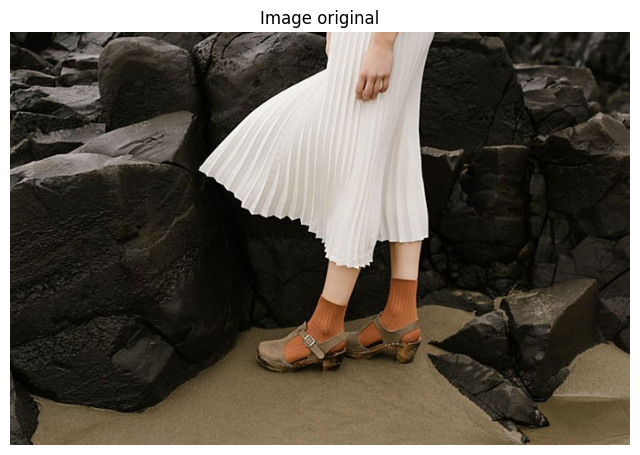

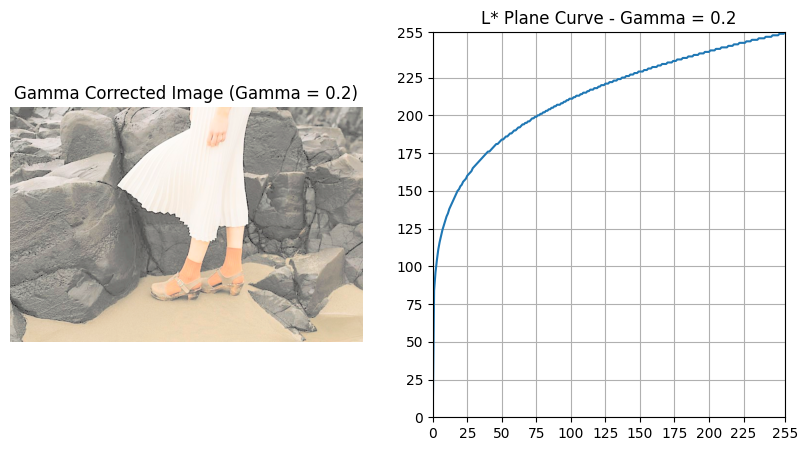

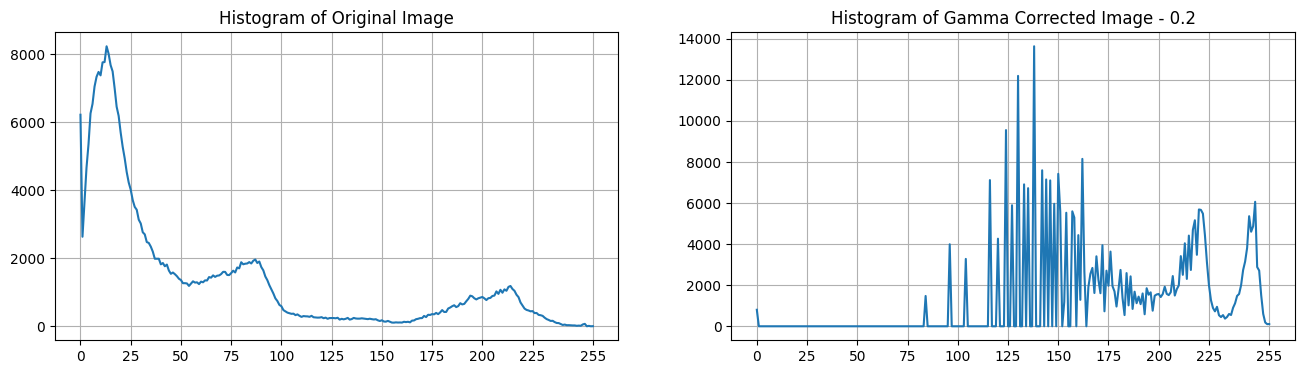

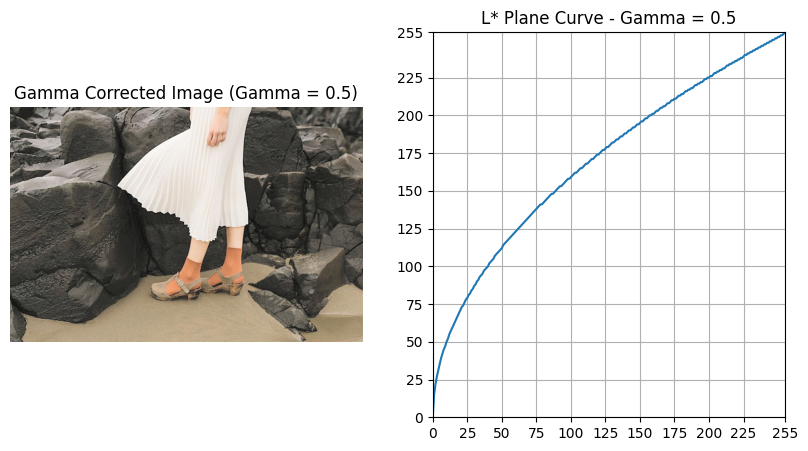

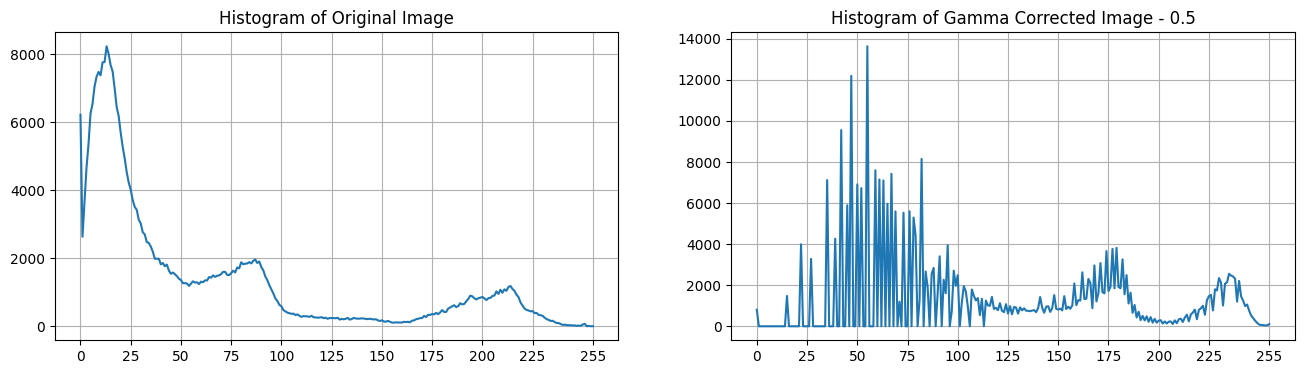

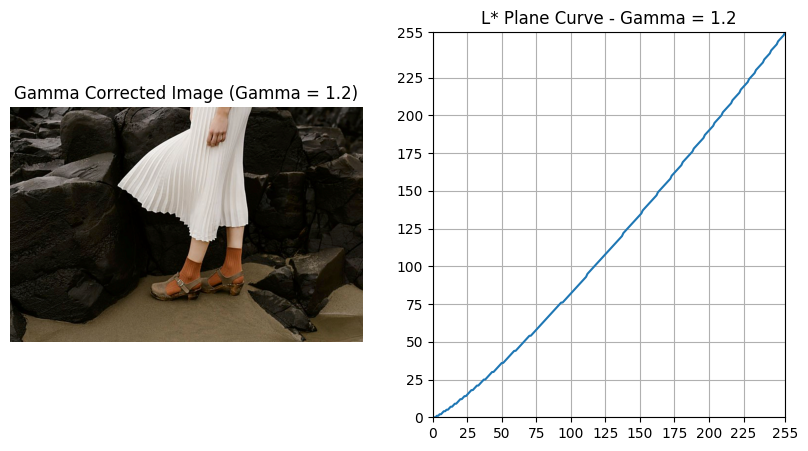

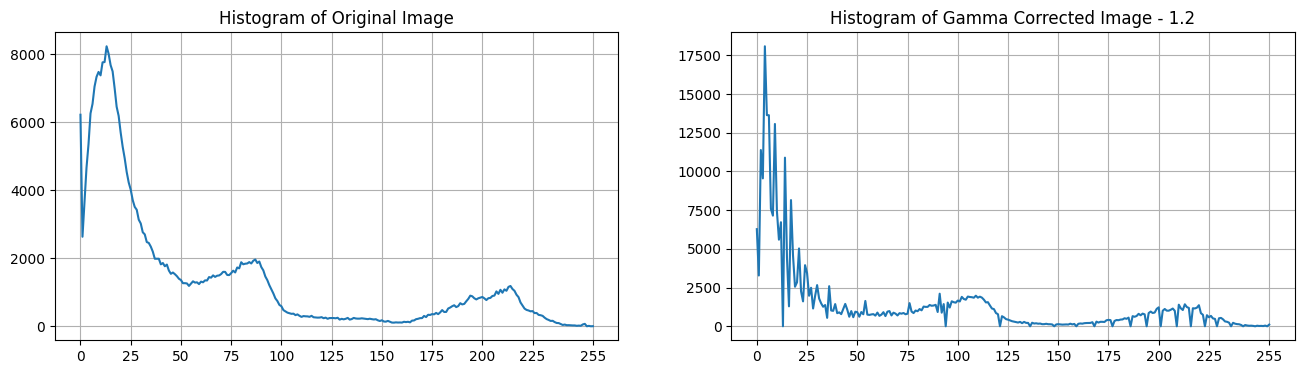

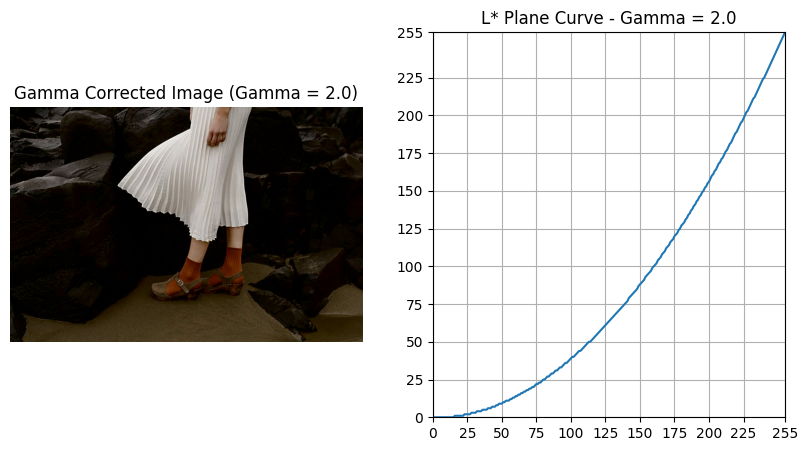

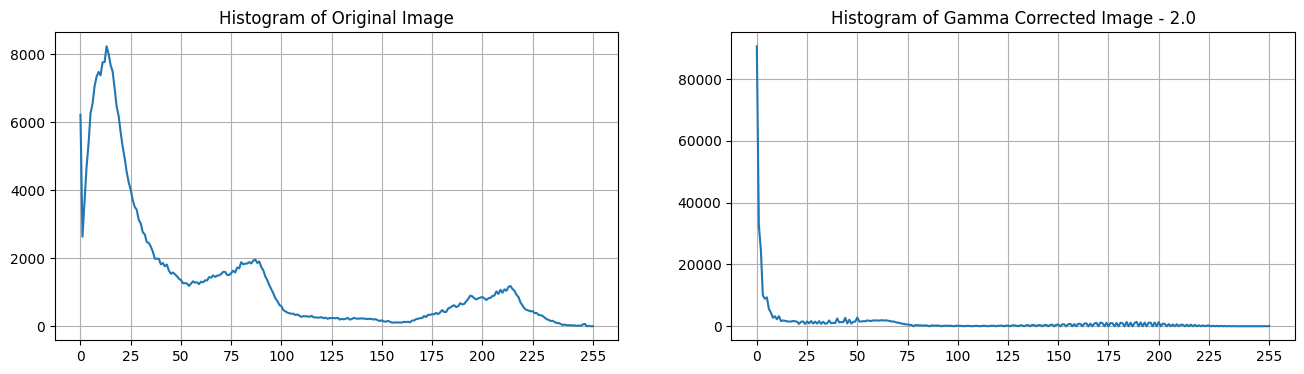

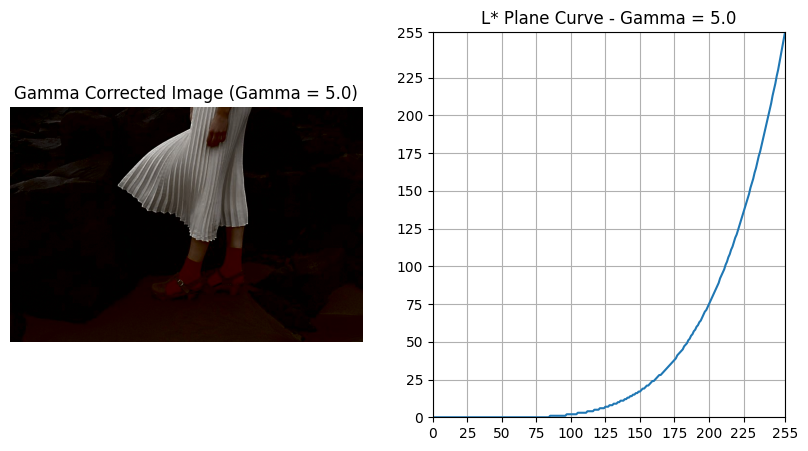

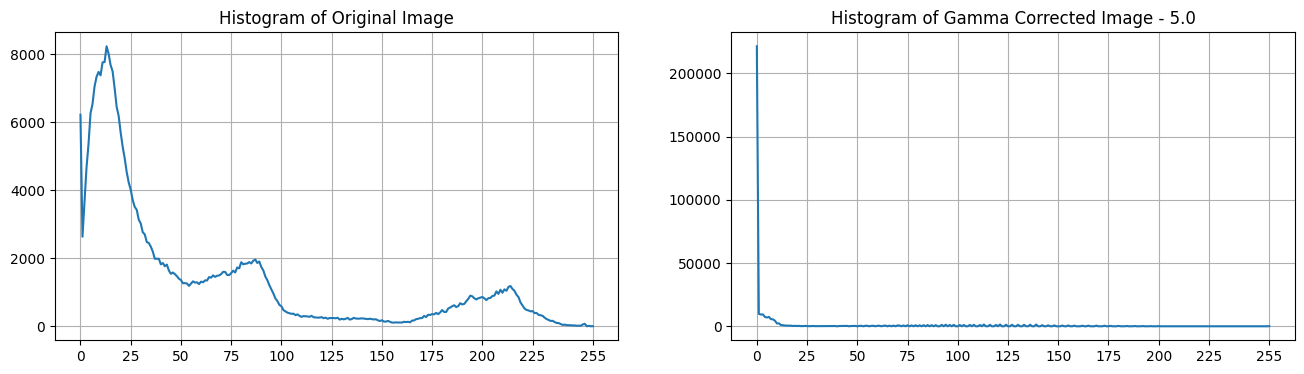

In [3]:
img_orig = cv.imread(r'D:\accedemic\sem-5\EN3160 - Image Processing and Machine Vision\assignment 1\highlights_and_shadows.jpg')
assert img_orig is not None

img = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.set_title('Image original')
ax.axis('off')

lab_image = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)
L_channel,A_channel,B_channel = cv.split(lab_image)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]
hist_g = []
gamma = [0.2, 0.5, 1.2, 2.0, 5.0]
for g in gamma:
    table = np.array([(i / 255.0) ** g * 255.0 for i in np.arange(0, 256)]).astype('uint8')
    img_gamma = cv.LUT(L_channel, table)
    lab_image= cv.merge([img_gamma,A_channel,B_channel]).astype('uint8')
    
    hist_f = cv.calcHist([img_orig], [0], None, [256], [0,256])
    hist_g=cv.calcHist([lab_image], [0], None, [256], [0,256])

    corrected_image = cv.cvtColor(lab_image, cv.COLOR_Lab2RGB)  # Convert Lab to BGR
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(corrected_image)
    ax[0].set_title("Gamma Corrected Image (Gamma = " + str(g) + ")")
    ax[0].axis('off')

    ax[1].plot(table)
    ax[1].set_title("L* Plane Curve - Gamma = " + str(g))
    ax[1].set_xlim(0, 255)
    ax[1].set_ylim(0, 255)
    ax[1].set_xticks(label)
    ax[1].set_yticks(label)
    ax[1].grid('on')

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].plot(hist_f)
    ax[0].set_title("Histogram of Original Image")
    ax[0].set_xticks(label)
    ax[0].grid('on')

    ax[1].plot(hist_g)
    ax[1].set_title("Histogram of Gamma Corrected Image - " + str(g))
    ax[1].set_xticks(label)
    ax[1].grid('on')
    plt.show()

4)

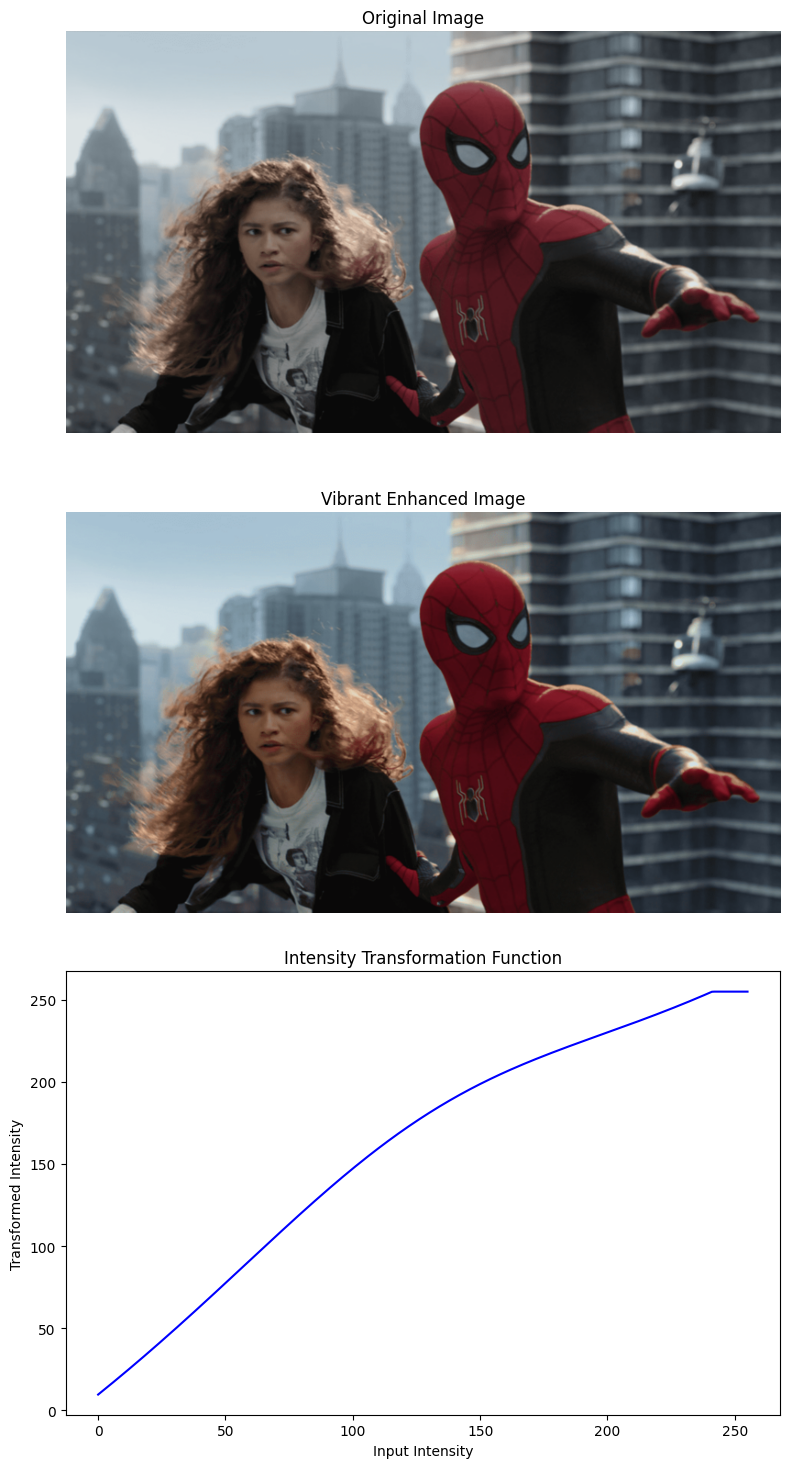

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def intensity_transformation(x, a, sigma):
    return np.minimum(x + (a * 128) *( np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))), 255)

# Load an image
image = cv.imread(r"D:\accedemic\sem-5\EN3160 - Image Processing and Machine Vision\assignment 1\spider.png")  # Replace with your image path

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Extract the saturation channel
saturation_channel = hsv_image[:, :, 1]

# Define parameters for the intensity transformation
a = 0.4  # Modify as needed
sigma = 70  # Modify as needed

# Apply the intensity transformation to the saturation channel
transformed_saturation = np.vectorize(intensity_transformation)(saturation_channel, a, sigma)

# Update the saturation channel in the HSV image
hsv_image[:, :, 1] = transformed_saturation

# Convert the modified HSV image back to BGR color space
modified_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

x = np.arange(0, 256)
y = np.arange(0, 256)
X, Y = np.meshgrid(x, y)

# Display the original and modified images
plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 1,  2)
plt.imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
plt.title('Vibrant Enhanced Image')
plt.axis('off')

plt.subplot(3, 1,  3)
transformation_curve = intensity_transformation(x, a, sigma)
plt.plot(x, transformation_curve,color='blue')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')

plt.tight_layout()
plt.show()

# cv.imshow("Original Image", image)
# cv.imshow("Modified Image", modified_image)
# cv.waitKey(0)
# cv.destroyAllWindows()


5)

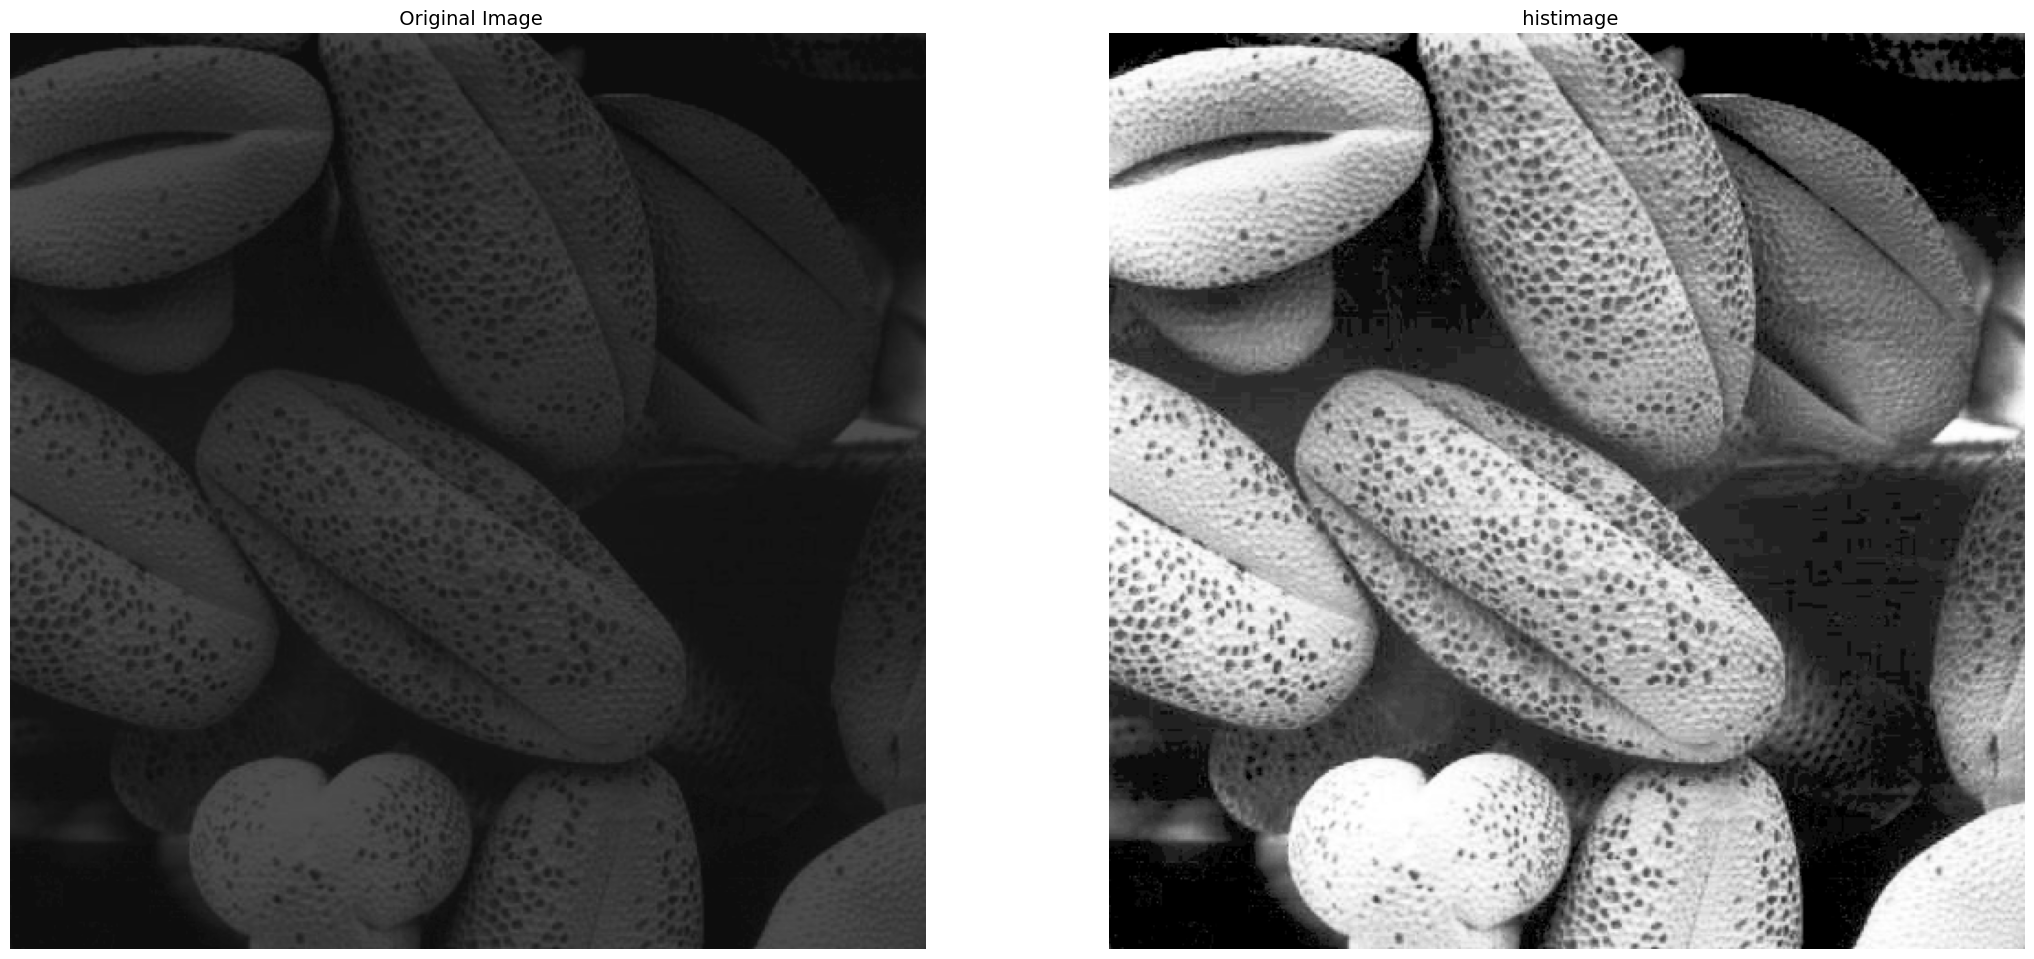

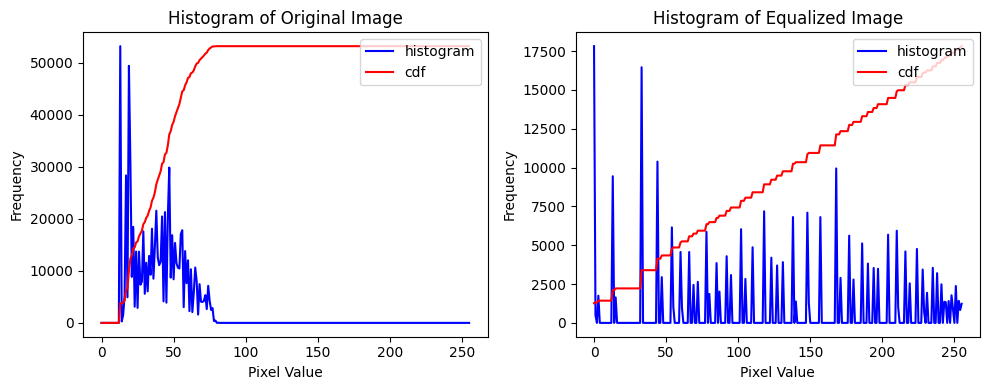

In [2]:
def histogram_equalization(image):
    # Convert the image to grayscale if it's in color
    if len(image.shape) == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized_image = cv.equalizeHist(image)

    return equalized_image

# Load the image
image_path = r'D:\accedemic\sem-5\EN3160 - Image Processing and Machine Vision\assignment 1\shells.tif'
image = cv.imread(image_path)

# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Calculate histograms for both original and equalized images
hist_original, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
cdf1 = hist_original.cumsum()
cdf_original = cdf1 * hist_original.max()/ cdf1.max()
hist_equalized, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0,256])
cdf2 = hist_equalized.cumsum()
cdf_normalized = cdf2 * hist_equalized.max()/ cdf2.max()
# Display the histograms
fig, ax = plt.subplots(1, 2, figsize=(26, 13))


ax[0].imshow(cv.cvtColor(image ,cv.COLOR_BGR2RGB))
ax[0].set_title(" Original Image", fontsize = 14)
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(equalized_image ,cv.COLOR_BGR2RGB))
ax[1].set_title(" histimage", fontsize = 14)
ax[1].axis("off")


plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Histogram of Original Image')
plt.plot(hist_original, color='b')
plt.plot(cdf_original, color = 'r')
plt.legend(('histogram','cdf'), loc = 'upper right')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.title('Histogram of Equalized Image')
plt.plot(hist_equalized, color ='b')
plt.plot(cdf_normalized, color = 'r')
plt.legend(('histogram','cdf'), loc = 'upper right')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
